<a href="https://colab.research.google.com/github/Jintophilip-ctl/AILearning/blob/main/FIRST_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frist AI**

# Load data

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#Data preparation

##Data separation as X and y


In [3]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [4]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# Data splitting

In [5]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
X_train


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [7]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


##Data visualization

###Data Shape

In [70]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)





X_train (915, 4)
y_train (915,)
X_test (229, 4)
y_test (229,)


###Pair Plot

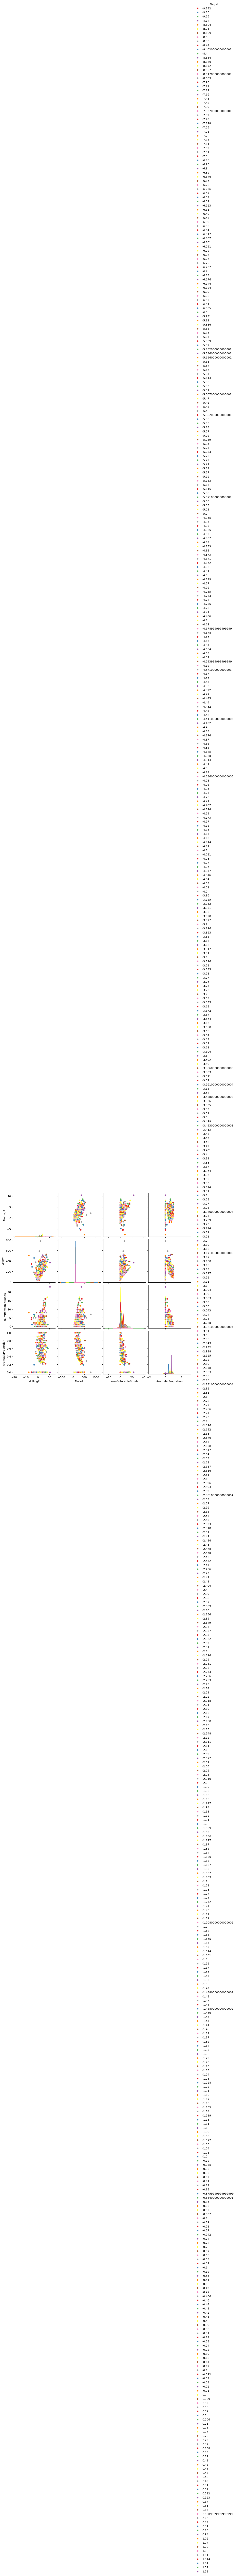

In [75]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Combine X_train and y_train into a DataFrame for easy plotting
data = pd.DataFrame(X_train, columns=['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion'])
data['Target'] = y_train

# Create a pairplot to visualize relationships between features
sns.pairplot(data, hue='Target', palette='Set1')

plt.show()


###2D Projection Using PCA:

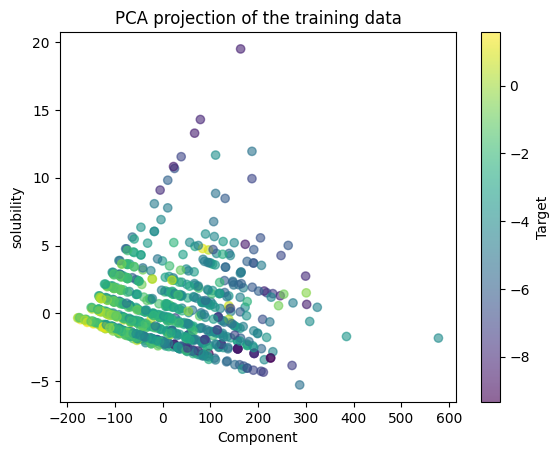

In [78]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the reduced 2D data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title('PCA projection of the training data')
plt.xlabel('Component')
plt.ylabel('solubility')
plt.colorbar(label='Target')
plt.show()


###Histogram of Target Distribution:

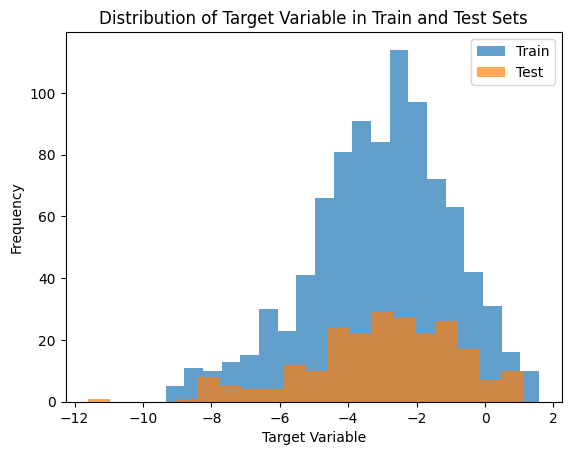

In [79]:
# Plot the distribution of the target variable in train and test sets
plt.hist(y_train, bins=20, alpha=0.7, label='Train')
plt.hist(y_test, bins=20, alpha=0.7, label='Test')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable in Train and Test Sets')
plt.legend()
plt.show()


# Model Building

##Linear Regression


###Training the model


In [35]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

###Applying the model to make a prediction

In [36]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [37]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [38]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

###Evaluate model performance

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [40]:

print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282


In [41]:

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [34]:
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


##Random Forest


###Training the model


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

###Applying the model to make a prediction

In [43]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

###Evaluate model performance

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [46]:

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Polynomial

In [47]:
from sklearn.preprocessing  import PolynomialFeatures
ply_features = PolynomialFeatures(degree=4, include_bias=False)
x_pr_train= ply_features.fit_transform(X_train)
x_pr_test= ply_features.fit_transform(X_test)

###Training the model

In [48]:

from sklearn.linear_model import LinearRegression

plr = LinearRegression()
plr.fit(x_pr_train, y_train)

LinearRegression()

###Applying the model to make a prediction

In [49]:
y_pl_train_pred = plr.predict(x_pr_train)
y_pl_test_pred = plr.predict(x_pr_test)

###Evaluate model performance

In [50]:
y_pl_train_pred

array([-4.51623967e+00, -1.10051949e+00, -1.61694482e+00, -1.34386768e+00,
       -1.32384458e+00, -2.94751481e+00, -3.23982453e+00, -4.06893579e+00,
       -5.95211909e+00, -1.70295850e+00, -2.76187094e+00, -4.08789888e+00,
       -3.59049739e+00, -2.16441976e+00, -7.48335222e+00, -1.60207820e+00,
       -4.19241301e+00, -3.48261787e+00, -3.77999832e+00, -3.56756794e+00,
       -1.88696872e+00, -3.19715783e+00, -2.19230014e+00, -2.86787642e+00,
        1.52155600e-01, -6.82924942e+00, -2.66154744e+00, -2.13621993e+00,
       -5.08068630e+00, -2.94572474e-01, -4.31161544e+00, -4.65463950e-01,
       -7.48335222e+00, -1.68189799e+00, -2.73651264e+00, -4.57982432e+00,
       -3.93750458e+00, -2.43352631e+00, -3.46673979e+00, -2.93739201e+00,
       -2.51410397e+00, -3.99611752e+00, -3.55696561e+00, -9.52580402e-01,
       -3.67377953e+00,  5.43652944e-03,  3.95063828e-01, -5.41078462e+00,
       -2.99150277e+00,  1.56478351e+00, -3.33428031e+00, -5.20074488e+00,
        3.83666410e-01, -

In [51]:
y_pl_test_pred

array([-2.93642968, -8.02512703, -1.88696872, -1.71810373, -1.31758898,
       -1.41451411,  0.18191044, -1.91842345, -6.44966879, -3.93584153,
       -4.68066828, -1.7029585 , -2.37409668, -0.9525804 , -3.94389064,
       -1.48861344, -1.03529368, -3.23380829, -3.63875819, -5.04419663,
       -2.90556648, -5.95211909, -6.73201757, -3.44978821, -3.47048163,
       -5.43316098, -4.22188273, -4.55736869, -4.10233543,  1.29065548,
        0.20694712, -3.92392865, -2.09479007, -1.19442523, -0.43264152,
       -2.40338276, -2.92825026, -2.93216064, -4.36765946, -1.01098213,
       -0.6388721 , -1.60018562, -6.77142596, -3.99341651, -5.83150462,
       -4.01219674, -3.78723623, -1.2710891 , -2.56092481, -1.9385037 ,
       -1.52950463, -5.43316098,  0.88545791, -3.30691222, -4.87744844,
       -1.78150851, -8.02512703, -0.56290588, -1.3402399 , -5.95211909,
       -2.05615267, -2.36494164, -2.08723628, -2.26050247, -0.74447457,
       -0.90641936, -3.1682139 , -3.2480733 , -1.38569069, -3.92

##Model comparison

##Evaluate model performance

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

pl_train_mse = mean_squared_error(y_train, y_pl_train_pred)
pl_train_r2 = r2_score(y_train,  y_pl_train_pred)

pl_test_mse = mean_squared_error(y_test, y_pl_test_pred)
pl_test_r2 = r2_score(y_test, y_pl_test_pred)

In [53]:

plr_results = pd.DataFrame(['Polynomial regression', pl_train_mse, pl_train_r2, pl_test_mse, pl_test_r2]).transpose()
plr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
plr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Polynomial regression,0.452126,0.894323,0.995937,0.794276


In [55]:
df_models = pd.concat([lr_results, rf_results,plr_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223
0,Polynomial regression,0.452126,0.894323,0.995937,0.794276


In [56]:
df_models.reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223
0,Polynomial regression,0.452126,0.894323,0.995937,0.794276


# Data visualization of prediction results

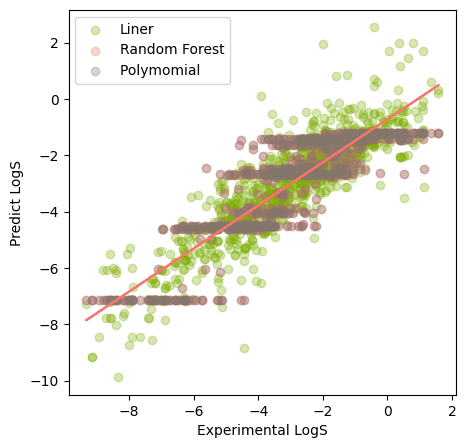

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3, label="Liner")
plt.scatter(x=y_train, y=y_rf_train_pred, c="#F8766D", alpha=0.3, label="Random Forest")
plt.scatter(x=y_train, y=y_rf_train_pred, c="#83766D", alpha=0.3, label="Polymomial ")
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

# Adding a legend to distinguish between the two models
plt.legend()

# Show the plot
plt.show()